<a href="https://colab.research.google.com/github/S0xb/MachineLearning/blob/master/CNN_Random_dataset_with_tensorflow_2_0_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
from tensorflow.python.client import device_lib
import numpy as np
import timeit
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import datetime as dt

from tensorflow.keras import layers


from tensorflow.python.framework import ops
ops.reset_default_graph()


In [0]:
!pip install tf-nightly-gpu-2.0-preview

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Device detected {}'.format(device_name))

#print("List device :",device_lib.list_local_devices())

Device detected /device:GPU:0


In [0]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf:
    print(module.__name__, module.__version__)

python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
matplotlib 3.0.3
numpy 1.14.6
pandas 0.22.0
sklearn 0.20.3
tensorflow 2.0.0-dev20190307


## Dataset

**tf.data.Dataset.from_tensor_slices **create a tensor from np.ndarray

1.   *batch(100) * => make a tensor with shape of 100 items
2.  *shuffle(4100)* => create a shuffle dataset at each  call  shuffle create a new random dataset



In [0]:
# Random data  

(x_train, y_train) = (10*np.random.random((82332, 16, 1, 1)), np.random.randint(10,size = (82332, 1)) )
(x_test, y_test) =   (10*np.random.random((10000, 16, 1, 1)), np.random.randint(10,size = (10000, 1)) )

print(y_train)
print(y_train.shape)
print(type(y_train))

#Train dataset
train_dataset = tf.data.Dataset.from_tensor_slices( (x_train[:41166],y_train[:41166]) ).batch(100).shuffle(41166)
#train_dataset = train_dataset.map(lambda x, y:  ( tf.divide(tf.cast(x, tf.float32),255.0),  tf.divide(tf.cast(y, tf.float32),255.0) )   )
train_dataset = train_dataset.map(lambda x, y:  ( tf.divide(tf.cast(x, tf.float32),255.0), tf.reshape(tf.one_hot(y, 10), (-1, 10)) ) )
train_dataset = train_dataset.repeat()

# Validation dataset
valid_dataset = tf.data.Dataset.from_tensor_slices( (x_train[41166:],y_train[41166:]) ).batch(100).shuffle(20000)
#valid_dataset = valid_dataset.map(lambda x, y:  ( tf.divide(tf.cast(x, tf.float32),255.0),  tf.divide(tf.cast(y, tf.float32),255.0) )   )
valid_dataset = valid_dataset.map(lambda x, y:  ( tf.divide(tf.cast(x, tf.float32),255.0), tf.reshape(tf.one_hot(y, 10), (-1, 10)) ) )
#valid_dataset = valid_dataset.repeat()

# Test dataset
test_dataset = tf.data.Dataset.from_tensor_slices( (x_test,y_test) ).batch(32)
#test_dataset = test_dataset.map(lambda x, y:  ( tf.divide(tf.cast(x, tf.float32),255.0),  tf.divide(tf.cast(y, tf.float32),255.0) )   )
test_dataset = test_dataset.map(lambda x, y:  ( tf.divide(tf.cast(x, tf.float32),255.0), tf.reshape(tf.one_hot(y, 10), (-1, 10)) ) )

print(train_dataset)
print(valid_dataset)
print(test_dataset)

print(x_train[41166:].shape)

[[7]
 [8]
 [3]
 ...
 [1]
 [6]
 [3]]
(82332, 1)
<class 'numpy.ndarray'>
<RepeatDataset shapes: ((None, 16, 1, 1), (None, 10)), types: (tf.float32, tf.float32)>
<MapDataset shapes: ((None, 16, 1, 1), (None, 10)), types: (tf.float32, tf.float32)>
<MapDataset shapes: ((None, 16, 1, 1), (None, 10)), types: (tf.float32, tf.float32)>
(41166, 16, 1, 1)


## Dataset

In [0]:

print("==============================================================")
print("                    Train dataset \n")
print("==============================================================")

#train_dataset = train_dataset.repeat()
count = 0

print("First loop")
# Make the loop 1 time take(1), only 1 batch (32)
for images,labels in train_dataset.take(3):
    count+=1
    print("Train image shape",images.shape)
    print("Train label image shape",labels.shape)
    print("First element of train label",labels[0:1])
    print("First element of train image",tf.transpose(images[0::1]))

print("\n\n==============================================================")
print("Second loop", count)

count = 0
# Make the loop 1 time take(1), only 1 batch (32)
for images,labels in train_dataset.take(3):
    count+=1
    print("Train image shape",images.shape)
    print("Train label image shape",labels.shape)
    print("First element of train label",labels[0:1])
    print("First element of train image",tf.transpose(images[0::1]))

print("\n\n==============================================================")
print("Third loop",count)
count=0

# Make the loop 1 time take(1), only 1 batch (32)
for images,labels in train_dataset.take(3):
    count+=1
    print("Train image shape",images.shape)
    print("Train label image shape",labels.shape)
    print("First element of train label",labels[0:1])
    print("First element of train image",tf.transpose(images[0::1]))

print("\n\n==============================================================")
print("Count=",count)
    
print("\n\n==============================================================")
print("                    Test dataset ")
print("==============================================================\n")

# Make the loop 1 time take(1) only 1 batch (32)
for test_images,test_labels in test_dataset.take(1):
    print(type(test_labels))
    print("Test image shape",tf.transpose(test_images.shape))
    print("Test label image shape",test_labels.shape)
    print("First element of test label",test_labels[0:1])
    #print("First element of test image",test_images[:,:,0:1])

  ## Encoding
  #### If your targets are one-hot encoded, use categorical_crossentropy.
        Examples of one-hot encodings:
            [1,0,0]
            [0,1,0]
            [0,0,1]
   #### But if your targets are integers, use sparse_categorical_crossentropy.
        Examples of integer encodings (for the sake of completion):
            1
            2
            3

## Small CNN Model 

In [0]:
def create_cnn_simple_model():

  #Create a tensor from a shape 
  inputs = tf.keras.layers.Input(shape=(16, 1, 1))

  #Layer 1
  x = tf.keras.layers.Conv2D(32, (1,1), padding='same', activation=tf.nn.relu)(inputs)
  x = tf.keras.layers.MaxPooling2D((2,1), (1,1), padding='same')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)

  x = tf.keras.layers.Dense(10)(x)
  predictions = tf.keras.layers.Softmax()(x)

  # Instantiate the model given inputs and outputs.
  model = tf.keras.Model(inputs=inputs, outputs=predictions)

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                #loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
  return model

In [0]:
def debug(model):
   #Debug Layer 
  for i,layer in enumerate(model.layers):
     print(i,layer.name)

In [0]:
def debug_weights(model):
   #Debug Layer 
  for i,layer in enumerate(model.layers):
     print("\n",i,layer.name,layer.get_weights())

In [0]:
#Fit model
model_cnn = create_cnn_simple_model()

print(debug(model_cnn))

print(model_cnn.summary())

0 input_7
1 conv2d_10
2 max_pooling2d_8
3 dropout_4
4 flatten_4
5 dense_8
6 dense_9
7 softmax_4
None
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 16, 1, 1)]        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 1, 32)         64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 1, 32)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 1, 32)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
________________________

In [0]:
#@title
class MyModel(tf.keras.Model):
    def __init__(self,num_classes=10):
    
        super(MyModel, self).__init__(name='mymodel_cnn')
        # 64 features map with kernel 5x5
           
        self.conv1 = tf.keras.layers.Conv2D(64, (5,1),
                                         padding='same',
                                         activation=tf.nn.relu,
                                         kernel_initializer=tf.keras.initializers.he_uniform(),
                                         kernel_regularizer=tf.keras.regularizers.l2(l=0.001))
        
        self.max_pool2d = tf.keras.layers.MaxPooling2D((2, 1), (1, 1), padding='same')
        
        self.max_norm = tf.keras.layers.BatchNormalization()
        
        self.conv2 = tf.keras.layers.Conv2D(64, (5,1),
                                         padding='same',
                                         activation=tf.nn.relu,
                                         kernel_initializer=tf.keras.initializers.he_uniform(),
                                         kernel_regularizer=tf.keras.regularizers.l2(l=0.001))
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(750, activation=tf.nn.relu,
                                      kernel_initializer=tf.keras.initializers.he_uniform(),
                                      kernel_regularizer=tf.keras.regularizers.l2(l=0.001))
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.fc2 = tf.keras.layers.Dense(10)
        self.softmax = tf.keras.layers.Softmax()

    

    
    @tf.function
    def call(self, x):
        x = self.conv1(x)
        #x = self.max_pool2d()
        #x = self.max_norm(x)
        #x = self.max_pool2d(self.conv2(x))
        #x = self.max_norm(x)
        #x = self.flatten(x)
        #x = self.dropout(self.fc1(x))
        #x = self.fc2(x)
        return self.softmax(x)

In [0]:
cnn = model_cnn.fit(train_dataset,verbose=1,  epochs=1, steps_per_epoch=10)

10/10 [==============================] - 3s 326ms/step - loss: 2.3027 - accuracy: 0.0930




 **   batch_size** 
    
    determines the number of samples in each mini batch. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around. batch_size allows to adjust between the two extremes: accurate gradient direction and fast iteration. Also, the maximum value for batch_size may be limited if your model + data set does not fit into the available (GPU) memory.
   
   
   **steps_per_epoch **
    
    the number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e. if your training set has a (generated) infinite size. If you have the time to go through your whole training data set I recommend to skip this parameter.
    
    
   ** validation_steps**
    
    similar to steps_per_epoch but on the validation data set instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.



In [0]:
debug_weights(model_cnn)

#weight_origin_0=model_cnn.layers[0]
#print(weight_origin_0)

#weight_origin_1=model_cnn.layers[1].get_weights()[0]
#print(weight_origin_1)

#biais_origin_2=model_cnn.layers[1].get_weights()[1]
#print(weight_origin_2)


 0 input_7 []

 1 conv2d_10 [array([[[[-0.07760686, -0.2579075 ,  0.38951865, -0.29346624,
           0.28956285,  0.2670963 , -0.23091064, -0.14645249,
           0.30718666,  0.01629734, -0.33836812,  0.05070893,
           0.11448285, -0.36157635, -0.19301613,  0.32691735,
          -0.41343436, -0.13496509,  0.34203017, -0.32457778,
           0.09458826,  0.38618279,  0.0098882 ,  0.04052328,
           0.15478635,  0.3153485 , -0.3506253 , -0.13773578,
          -0.24979366, -0.38240984,  0.0315172 , -0.1454744 ]]]],
      dtype=float32), array([ 0.        ,  0.        , -0.01543235,  0.        , -0.01282639,
       -0.01187256,  0.        ,  0.        , -0.01474376, -0.00272755,
        0.        , -0.00363598, -0.00542663,  0.        ,  0.        ,
       -0.01316027,  0.        ,  0.        , -0.01422015,  0.        ,
       -0.00576609, -0.01534725, -0.00092845, -0.00293234, -0.00660635,
       -0.0134055 ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.003116

In [0]:
# Fit the model 
if tf.test.is_gpu_available() > 0:
    with tf.device(tf.test.gpu_device_name()):
      
      callbacks = [
        # Write TensorBoard logs to `./logs` directory
        tf.keras.callbacks.TensorBoard(log_dir='./log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")), write_images=True)
      ]

      #steps_per_epoch argument—this is the number of training steps the model runs 
      #before it moves to the next epoch. Since the Dataset yields batches of data, 
      #this snippet does not require a batch_size.
      # steps_per_epoch give indirectly the batch size


      
      history = model_cnn.fit(train_dataset,verbose=1,  epochs=10, steps_per_epoch=100,
                validation_data=valid_dataset,
                validation_steps=50) #, callbacks=callbacks)

weights = model_cnn.layers[2].get_weights()
print(weights)

Epoch 1/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3028 - accuracy: 0.1045 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 2/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3024 - accuracy: 0.1048 - val_loss: 2.3029 - val_accuracy: 0.0982
Epoch 4/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3025 - accuracy: 0.1023 - val_loss: 2.3031 - val_accuracy: 0.0982
Epoch 5/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3024 - accuracy: 0.1067 - val_loss: 2.3030 - val_accuracy: 0.0982
Epoch 6/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3025 - accuracy: 0.1019 - val_loss: 2.3031 - val_accuracy: 0.0982
Epoch 7/10
100/100 [==============================] - 1s 9ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0982
Epoch 

In [0]:
history_dict = history.history
history_dict.keys()

print(history.history)

{'loss': [2.3027001938713667, 2.302716381549835, 2.302625699043274, 2.302599353790283, 2.3023777318000795], 'accuracy': [0.100541845, 0.1027, 0.1016, 0.1022, 0.1014], 'val_loss': [2.3026007223129272, 2.302179536819458, 2.302261276245117, 2.3025460195541383, 2.302763237953186], 'val_accuracy': [0.0984, 0.112, 0.1094, 0.1006, 0.1006]}


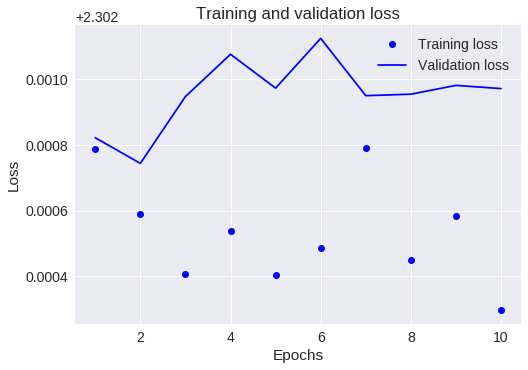

In [0]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


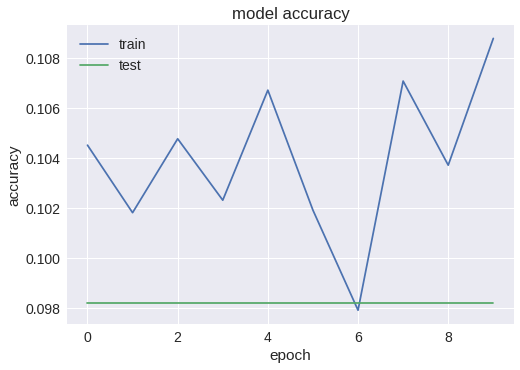

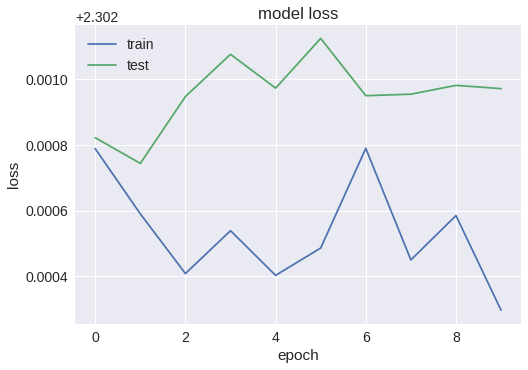

In [0]:
history_dict = history.history

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
loss, acc = model_cnn.evaluate(test_dataset)
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1006
Trained model, accuracy: 10.06%


In [0]:
#Confusion matric result

from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model_cnn.predict(test_dataset, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [0]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[233   0   0   0   0   0   0   0 846   0]
 [198   0   0   0   0   0   0   0 750   0]
 [222   0   0   0   0   0   0   0 758   0]
 [210   0   0   0   0   0   0   0 758   0]
 [220   0   0   0   0   0   0   0 780   0]
 [221   0   0   0   0   0   0   0 798   0]
 [223   0   0   0   0   0   0   0 769   0]
 [207   0   0   0   0   0   0   0 805   0]
 [194   0   0   0   0   0   0   0 773   0]
 [228   0   0   0   0   0   0   0 807   0]]


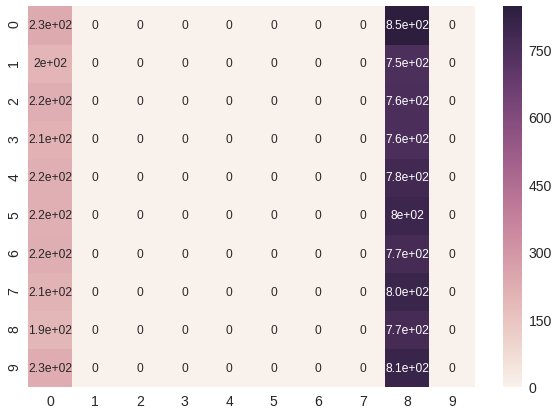

In [0]:
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, range(10),range(10))

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

## Another CNN Model (bigger)

In [0]:
def create_cnn_model():

    # Model as sequential
  kernel1 = 32
  kernel2 = 64
  kernel3 = 128

  kernel1_size = (3,1)
  kernel2_size = (3,1)
  kernel3_size = (3,1)

  pool_size = (2,1)
  stride_size = (1,1)
   
  if tf.test.is_gpu_available() > 0:
    with tf.device('/gpu:0'):

      #Create a tensor from a shape 
      inputs = tf.keras.layers.Input(shape=(16, 1, 1))

      #Layer 1
      x = tf.keras.layers.Conv2D(kernel1, kernel1_size,padding='same',
                                 kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.55, maxval=0.55, seed=None),
                                 kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
                                 activation=tf.nn.relu)(inputs)

      x = tf.keras.layers.MaxPooling2D(pool_size, stride_size, padding='same')(x)
      x = tf.keras.layers.BatchNormalization()(x)

      #Layer 2
      x = tf.keras.layers.Conv2D(kernel2, kernel2_size, activation='relu', padding='same')(x)
      x = tf.keras.layers.MaxPooling2D(pool_size, stride_size, padding='same')(x)
      x = tf.keras.layers.BatchNormalization()(x)

      #Layer 3
      x = tf.keras.layers.Conv2D(kernel3, kernel3_size, activation='relu' , padding='same')(x)
      x = tf.keras.layers.MaxPooling2D(pool_size, stride_size, padding='same')(x)
      x = tf.keras.layers.BatchNormalization()(x)

      x = tf.keras.layers.Flatten()(x)

      x = tf.keras.layers.Dense(750, activation=tf.nn.relu,
                                kernel_initializer=tf.keras.initializers.he_uniform(),
                                kernel_regularizer=tf.keras.regularizers.l2(l=0.001))(x)


      x = tf.keras.layers.Dropout(0.5)(x)
      x = tf.keras.layers.Dense(10)(x)
      predictions = tf.keras.layers.Softmax()(x)

      # Instantiate the model given inputs and outputs.
      model = tf.keras.Model(inputs=inputs, outputs=predictions)

      model.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    #loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
  return model

In [0]:
#Fit model
model_cnn = create_cnn_model()

print(debug(model_cnn))

print(model_cnn.summary())

0 input_6
1 conv2d_7
2 max_pooling2d_5
3 batch_normalization_v2_3
4 conv2d_8
5 max_pooling2d_6
6 batch_normalization_v2_4
7 conv2d_9
8 max_pooling2d_7
9 batch_normalization_v2_5
10 flatten_3
11 dense_6
12 dropout_3
13 dense_7
14 softmax_3
None
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 16, 1, 1)]        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 1, 32)         128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 1, 32)         0         
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 16, 1, 32)         128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 1, 64)         6208      
_____________

In [0]:
# Fit the model 
if tf.test.is_gpu_available() > 0:
    with tf.device(tf.test.gpu_device_name()):
      
      callbacks = [
        # Write TensorBoard logs to `./logs` directory
        tf.keras.callbacks.TensorBoard(log_dir='./log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")), write_images=True)
      ]

      #steps_per_epoch argument—this is the number of training steps the model runs 
      #before it moves to the next epoch. Since the Dataset yields batches of data, 
      #this snippet does not require a batch_size.
      # steps_per_epoch give indirectly the batch size

      cnn = model_cnn.fit(train_dataset,verbose=1,  epochs=1, steps_per_epoch=10,
                validation_data=valid_dataset,
                validation_steps=50) #, callbacks=callbacks)



10/10 [==============================] - 3s 287ms/step - loss: 5.3797 - accuracy: 0.1020 - val_loss: 3.8149 - val_accuracy: 0.1015


In [0]:
# 313 steps,because batch = 32  (10000 (size test train)/ 32) = 313
loss, acc = model_cnn_api.evaluate(test_dataset)
print("Trained model, accuracy: {:5.2f}%".format(100*acc))